# Home Work

In [1]:
import pandas as pd
import numpy as np

from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from scipy import stats

In [2]:
df_moto = pd.read_csv('mtcars.csv')

In [77]:
split=np.random.rand(len(df_moto))>0.7


In [88]:
ml=df_moto[split]
test=df_moto[~split]
ml.info()
test.info()
ml.to_csv('ml.csv', encoding='utf-8', index=False)
test.to_csv('tes.csv', encoding='utf-8', index=False)
ml = pd.read_csv('ml.csv')
test = pd.read_csv('tes.csv')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 26
Data columns (total 12 columns):
model    11 non-null object
mpg      11 non-null float64
cyl      11 non-null int64
disp     11 non-null float64
hp       11 non-null int64
drat     11 non-null float64
wt       11 non-null float64
qsec     11 non-null float64
vs       11 non-null int64
am       11 non-null int64
gear     11 non-null int64
carb     11 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 1 to 31
Data columns (total 12 columns):
model    21 non-null object
mpg      21 non-null float64
cyl      21 non-null int64
disp     21 non-null float64
hp       21 non-null int64
drat     21 non-null float64
wt       21 non-null float64
qsec     21 non-null float64
vs       21 non-null int64
am       21 non-null int64
gear     21 non-null int64
carb     21 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 2.1+ KB


In [43]:
x1=ml['wt']
y1=ml['mpg']

In [44]:
x2=test['wt']
y2=test['mpg']

In [46]:
x_ml = np.array(x1)
y_ml = np.array(y1)
x_test = np.array(x2)
y_test = np.array(y2)

In [48]:
x_ml = x_ml.reshape(-1,1)
x_test = x_test.reshape(-1,1)
#y_ml = y_ml.reshape(-1,1)
#y_test = y_test.reshape(-1,1)

In [49]:
clf = LinearRegression(normalize=True)
clf.fit(x_ml,y_ml)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [51]:
y_pred = clf.predict(x_test)

In [52]:
print('The prediction accuracy = ', r2_score(y2,y_pred))


The prediction accuracy =  0.7315378894570815


In [58]:
y_pred_rounded = np.around(y_pred,0)


In [59]:
df_predict = pd.DataFrame({'Weight' : x_test.tolist(), 'Predicted MPG': list(y_pred_rounded.tolist())}, columns=['Weight', 'Predicted MPG'])


In [60]:
df_predict.to_csv('predict.csv', encoding='utf-8', index=False)


In [61]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x_ml.flatten(),y_ml.flatten())
print ("The slope and intercept of the regression line are :" , slope,intercept)

The slope and intercept of the regression line are : -4.629796885809224 35.85144996994681


In [62]:
x_user = float(input('Enter the wt value : '))
m = np.asscalar(slope)
c = np.asscalar(intercept)

y_result = m*x_user + c
print ("Predicted mpg = ", round(y_result))

Enter the wt value : 2.875
Predicted mpg =  23


In [17]:
test.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


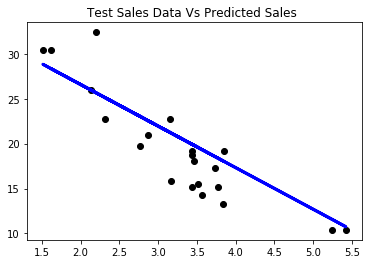

In [63]:
plt.title('Test Sales Data Vs Predicted Sales ')
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.show()

# Class Work

In [2]:
import pandas as pd
import numpy as np

from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from scipy import stats
import seaborn           as sns
import statsmodels.api   as sm

In [8]:
cars = sm.datasets.get_rdataset('mtcars').data
print(cars.head(4).T)
print(cars.info())

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

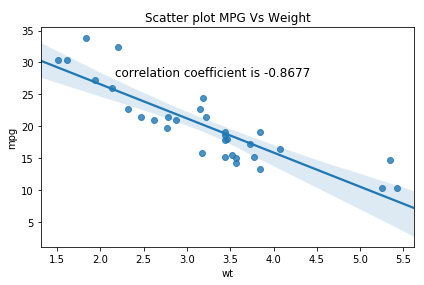

In [64]:
sns.regplot(y=cars.mpg, x=cars.wt, ci = 95)

corcoef = np.corrcoef(cars.wt, cars.mpg)[0,1] #[0,1] is rows and column

text_cc = '\n\n\n\ncorrelation coefficient is %1.4f'%corcoef
plt.title('Scatter plot MPG Vs Weight')
plt.suptitle(text_cc)
plt.gcf().tight_layout()

In [11]:
sns.heatmap(cars.corr(), cmap='BuGn')
plt.show()

NameError: name 'cars' is not defined

In [25]:
print('\nCorrelation coefficient between mpg and wt is %1.2f' %np.corrcoef(cars.mpg, cars.wt)[0,1])


Correlation coefficient between mpg and wt is -0.87


In [26]:
import statsmodels.api as sm
X  =  cars.wt
y  =  cars.mpg

X = sm.add_constant(X) # Add an intercept to our model

model         = sm.OLS(y, X).fit() ## OLS(output, input)
predictions   = model.predict(X)

## Print the statistics
model.summary()

C:\Users\sujit\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Tue, 14 May 2019   Prob (F-statistic):           1.29e-10
Time:                        10:52:43   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2851      1.878     19.858      0.000      33.450      41.120
wt            -5.3445      0.559     -9.559      0.000      -6.486      -4.203
==============================================================================
Omnibus:                        2.988   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                2.399
Skew:                           0.668   Prob(JB):                        0.301
Kurtosis:                       2.877   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
 # calculate SSE, SSM & SST

SSE   = 0
SST   = 0

for i in range(len(predictions)):
    SSE    += (predictions[i] - y[i])**2

yMean       = np.mean(y)

for i in range(len(predictions)):
    SST    += (y[i] - yMean)**2

print('SSE = %5.4f SST = %5.4f' % (SSE, SST))

Rsq = np.round(1 - (SSE / SST),4)

print("Calculated %s = %1.3f" % ("R squared",Rsq) )   

SSE = 278.3219 SST = 1126.0472
Calculated R squared = 0.753


In [85]:
sns.set(style="whitegrid")
import statsmodels.api as sm
X  =  cars.wt
y  =  cars.mpg

X = sm.add_constant(X) # Add an intercept to our model

model                 = sm.OLS(y, X).fit() ## OLS(output, input)
cars['predictions']   = model.predict(X)
residuals             = model.resid

C:\Users\sujit\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


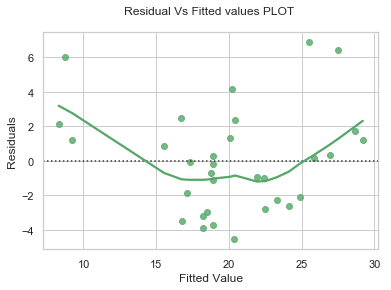

In [86]:
ax = sns.residplot(cars.predictions, residuals, lowess = True, color = "g")
ax.set(xlabel='Fitted Value', ylabel='Residuals', title = 'Residual Vs Fitted values PLOT \n')
plt.show()